In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [1]:
def create_grid(n, m):
    """
    Creates a grid of size n x m, with each cell initialized to 0.

    Parameters:
    - n (int): The number of rows in the grid.
    - m (int): The number of columns in the grid.

    Returns:
    - List[List[int]]: A 2D list representing the grid.
    """
    return [[0 for _ in range(m)] for _ in range(n)]

# Example usage:
n = 3  # Number of rows
m = 4  # Number of columns
grid = create_grid(n, m)

for row in grid:
    print(row)

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]


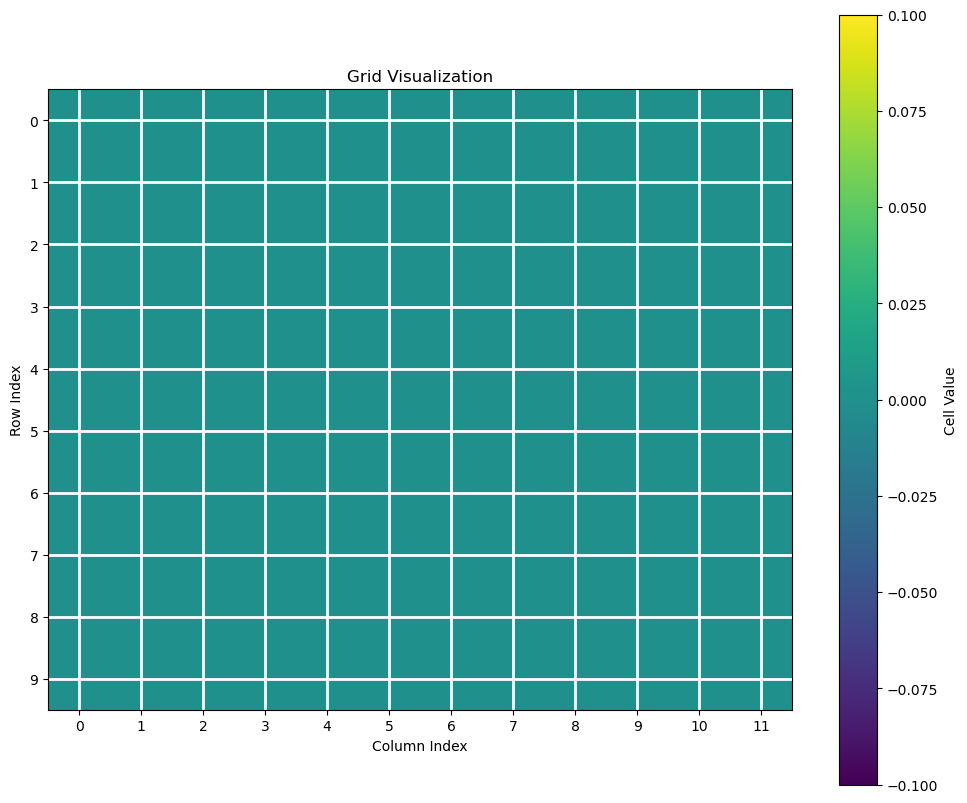

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(n, m):
    """
    Creates and displays a grid of size n x m using matplotlib.

    Parameters:
    - n (int): The number of rows in the grid.
    - m (int): The number of columns in the grid.
    """
    # Create a grid initialized to 0
    grid = np.zeros((n, m))

    # Display the grid
    plt.figure(figsize=(m, n))
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cell Value')
    
    # Customize the plot
    plt.xticks(range(m), labels=[str(i) for i in range(m)])
    plt.yticks(range(n), labels=[str(i) for i in range(n)])
    plt.title('Grid Visualization')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    
    # Show grid lines for clarity
    plt.grid(which='major', color='w', linestyle='-', linewidth=2)
    plt.show()

# Example usage:
n = 10  # Number of rows
m = 12  # Number of columns
plot_grid(n, m)


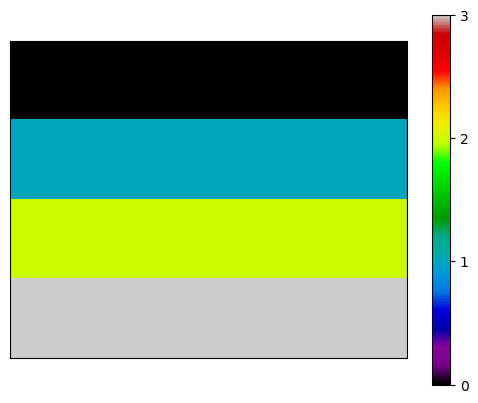

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def display_colored_grid(n, m):
    """
    Displays a grid of size n x m using matplotlib, with each row having a different color.

    Parameters:
    - n (int): The number of rows in the grid.
    - m (int): The number of columns in the grid.
    """
    # Create a grid where each cell's value represents its row number
    grid = np.arange(n).reshape(n, 1) * np.ones(m).reshape(1, m)
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots()
    # Display the grid. The 'cmap' parameter controls the colormap.
    # 'nipy_spectral' is used here for distinct colors, but you can choose another.
    cax = ax.matshow(grid, cmap="nipy_spectral")
    
    # Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add a colorbar to show the mapping from values to colors
    plt.colorbar(cax, ticks=range(n))
    
    # Show the plot
    plt.show()

# Example usage:
n = 4  # Number of rows
m = 5  # Number of columns
display_colored_grid(n, m)


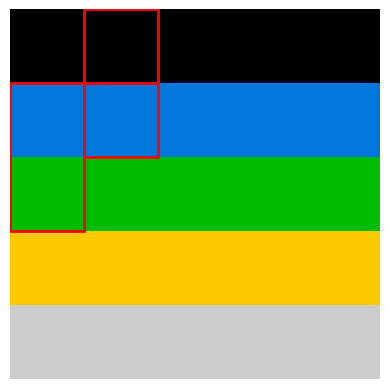

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_colored_grid_with_rectangles(n, m, k):
    """
    Plots an n x m grid with each row colored differently and k rectangles grouping random cells.

    Parameters:
    - n (int): The number of rows.
    - m (int): The number of columns.
    - k (int): The number of rectangles to draw.
    """
    # Create an n x m grid, each cell contains its row index
    grid = np.arange(n).repeat(m).reshape(n, m)
    
    # Plot setup
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap="nipy_spectral", extent=[0, m, 0, n])  # Using a colormap with n distinct colors
    
    # Add rectangles at k random positions
    for _ in range(k):
        # Random width and height
        width, height = random.randint(1, m//2), random.randint(1, n//2)
        # Random position, ensuring the rectangle stays within bounds
        x, y = random.randint(0, m-width), random.randint(0, n-height)
        
        # Create a rectangle
        rect = plt.Rectangle((x, n-y-height), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    # Setting the axis limits
    plt.xlim(0, m)
    plt.ylim(0, n)
    
    # Hide the axes
    plt.axis('off')
    
    plt.show()

# Example usage
n = 5  # Number of rows
m = 5  # Number of columns
k = 3  # Number of rectangles
plot_colored_grid_with_rectangles(n, m, k)


C:\Users\206539\AppData\Local\Temp\ipykernel_21944\1717150432.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', k)


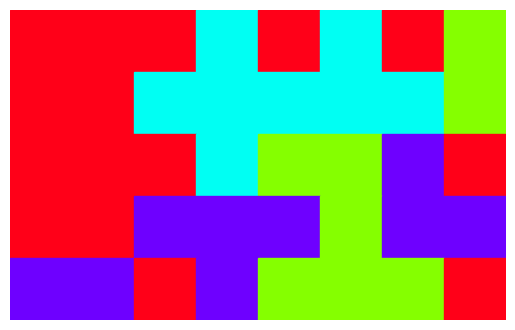

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

def generate_random_grid(n, m, k):
    # Initialize the grid with zeros
    grid = np.zeros((n, m))
    
    # Generate k distinct colors
    colors = plt.cm.get_cmap('hsv', k)
    
    # Keep track of the number of cells filled for each color
    cells_filled = {i: 0 for i in range(1, k+1)}
    
    # Define the total number of cells to be filled
    total_cells = n * m
    
    # Begin the region-growing process
    while total_cells > sum(cells_filled.values()):
        for color_index in range(1, k+1):
            # If all cells for this color are filled, continue
            if cells_filled[color_index] >= (n * m) // k:
                continue
            
            # Find a random cell that is not yet filled
            while True:
                row, col = random.randint(0, n-1), random.randint(0, m-1)
                if grid[row][col] == 0:
                    break
            
            # Fill the cell with the current color
            grid[row][col] = color_index
            cells_filled[color_index] += 1
            
            # Randomly grow the region, ensuring it doesn't overlap with other colors
            directions = [(0,1), (1,0), (0,-1), (-1,0)]
            random.shuffle(directions)
            for dr, dc in directions:
                new_row, new_col = row + dr, col + dc
                if (0 <= new_row < n) and (0 <= new_col < m) and grid[new_row][new_col] == 0:
                    grid[new_row][new_col] = color_index
                    cells_filled[color_index] += 1
                    if cells_filled[color_index] >= (n * m) // k:
                        break
            if total_cells <= sum(cells_filled.values()):
                break

    return grid, colors

def plot_grid(grid, colors, n, m):
    # Create a figure and a subplot
    fig, ax = plt.subplots()
    for i in range(n):
        for j in range(m):
            ax.add_patch(plt.Rectangle((j, n-i-1), 1, 1, color=colors(int(grid[i][j]))))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Grid size and number of colors
n, m, k = 5, 8, 5  # Example values

# Generate the grid and plot it
grid, colors = generate_random_grid(n, m, k)
plot_grid(grid, colors, n, m)


C:\Users\206539\AppData\Local\Temp\ipykernel_21944\3289306665.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', k+1)


<Figure size 1500x1000 with 0 Axes>

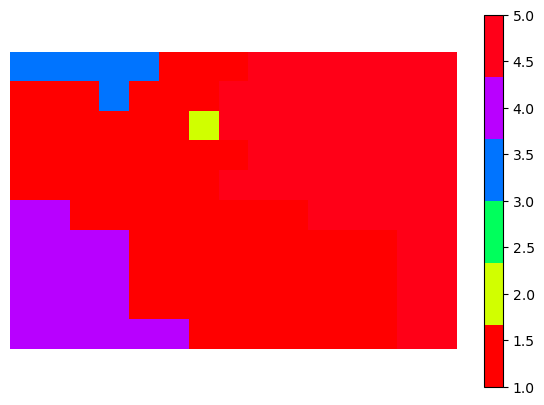

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

def create_adjacent_colored_grid(m, n, k):
    """
    Creates a grid of size m x n, with adjacent cells grouped together with k different colors.
    
    Parameters:
    - m (int): The number of rows in the grid.
    - n (int): The number of columns in the grid.
    - k (int): The number of color groups to be formed.

    Returns:
    - A matplotlib plot of the grid with adjacent cells colored the same.
    """
    # Create an m x n grid initialized with zeros
    grid = np.zeros((m, n), dtype=int)

    # Initialize the grid with k different colors randomly
    for i in range(k):
        # Choose a random cell that is not already colored (not zero)
        cell = (random.randint(0, m-1), random.randint(0, n-1))
        while grid[cell] != 0:
            cell = (random.randint(0, m-1), random.randint(0, n-1))
        grid[cell] = i + 1  # Set to a new color

    # Create a list of offsets to look for adjacent cells
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Randomly choose cells to color until all cells are filled
    while np.any(grid == 0):
        # Randomly choose a cell that is already colored
        colored_cells = np.argwhere(grid != 0)
        cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])

        # Randomly choose an adjacent cell to color
        random.shuffle(adjacent_offsets)
        for offset in adjacent_offsets:
            adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
            # Check if the adjacent cell is within the grid and not already colored
            if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                # Color the adjacent cell with the same color as the current cell
                grid[adjacent_cell] = grid[cell]
                break

    # Create a color map with k distinct colors
    colors = plt.cm.get_cmap('hsv', k+1)

    # Plot the grid
    plt.figure(figsize=(n, m))
    plt.matshow(grid, cmap=colors)
    plt.colorbar()

    # Turn off the axis labels
    plt.axis('off')
    
    # Display the plot
    plt.show()
    return grid
# Example usage:
m = 10  # Number of rows
n = 15  # Number of columns
k = 5   # Number of color groups

grid = create_adjacent_colored_grid(m, n, k)


C:\Users\206539\AppData\Local\Temp\ipykernel_21944\3289306665.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', k+1)


<Figure size 1500x1000 with 0 Axes>

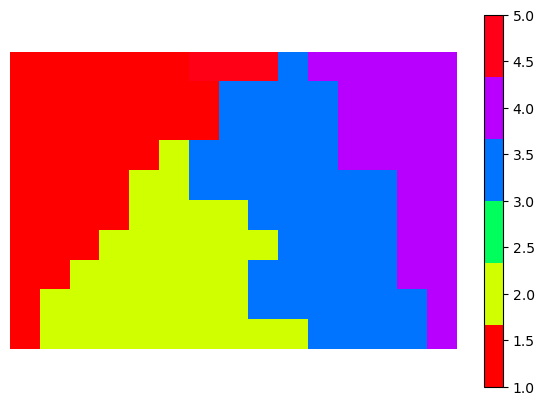

In [8]:
create_adjacent_colored_grid(m, n, k)

C:\Users\206539\AppData\Local\Temp\ipykernel_21944\632220885.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', k+1)


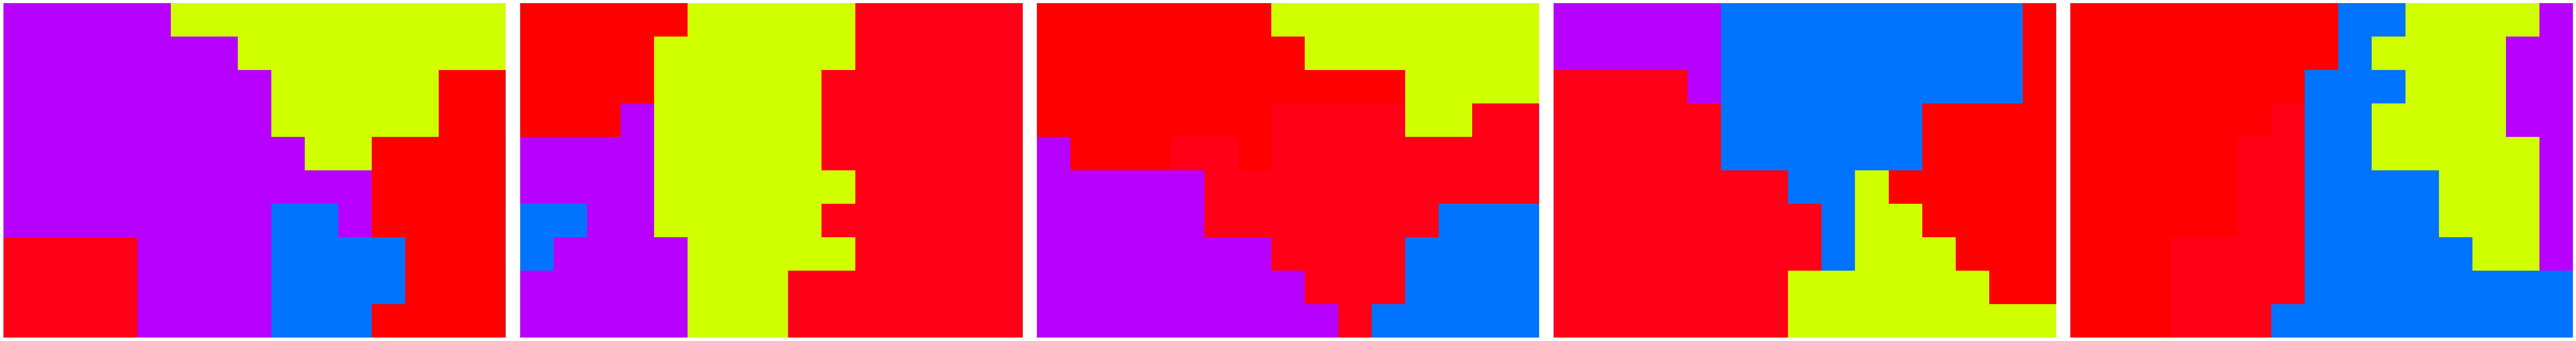

[array([4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), array([4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2]), array([4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1]), array([4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1]), array([4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 1, 1, 1, 1]), array([5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1]), array([5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1]), array([5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5]), array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5]), array([1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5]), array([1, 1, 1, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5]), array([4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5]), array([4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5]), array([3, 3, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5]), array([3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5]), array([4, 4, 4, 4, 4, 2, 2,

In [14]:
def plot_multiple_grids(num_grids, m, n, k):
    """
    Plots multiple grids of size m x n, with adjacent cells grouped together with k different colors.

    Parameters:
    - num_grids (int): The number of grids to plot.
    - m (int): The number of rows in each grid.
    - n (int): The number of columns in each grid.
    - k (int): The number of color groups to be formed in each grid.
    """
    # Create a figure with subplots for each grid
    fig, axes = plt.subplots(1, num_grids, figsize=(n * num_grids, m))
    grids = []
    for ax in axes:
        # Create an m x n grid initialized with zeros
        grid = np.zeros((m, n), dtype=int)

        # Initialize the grid with k different colors randomly
        for i in range(k):
            cell = (random.randint(0, m-1), random.randint(0, n-1))
            while grid[cell] != 0:
                cell = (random.randint(0, m-1), random.randint(0, n-1))
            grid[cell] = i + 1

        # Create a list of offsets to look for adjacent cells
        adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        # Randomly choose cells to color until all cells are filled
        while np.any(grid == 0):
            colored_cells = np.argwhere(grid != 0)
            cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])
            random.shuffle(adjacent_offsets)
            for offset in adjacent_offsets:
                adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
                if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                    grid[adjacent_cell] = grid[cell]
                    break
        grids.extend(grid)
        # Create a color map with k distinct colors
        colors = plt.cm.get_cmap('hsv', k+1)

        # Plot the grid
        ax.matshow(grid, cmap=colors)
        ax.axis('off')  # Turn off the axis labels
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    return grids

# Example usage:
num_grids = 5  # Number of grids to plot
m = 10         # Number of rows in each grid
n = 15         # Number of columns in each grid
k = 5          # Number of color groups in each grid

grids = plot_multiple_grids(num_grids, m, n, k)
print(grids)



In [47]:



def plot_grids_in_rows_old(num_grids, m, n, k, per_row):
    """
    Plots multiple grids of size m x n, with adjacent cells grouped together with k different colors,
    arranged in a specified number of grids per row.

    Parameters:
    - num_grids (int): The total number of grids to plot.
    - m (int): The number of rows in each grid.
    - n (int): The number of columns in each grid.
    - k (int): The number of color groups to be formed in each grid.
    - per_row (int): The number of grids to display per row.
    """
    
    grids = []
    # Calculate the required number of rows to display all grids
    num_rows = (num_grids + per_row - 1) // per_row

    # Create a figure with subplots arranged in rows
    fig, axes = plt.subplots(num_rows, per_row, figsize=(n * per_row, m * num_rows))

    # If there's only one row, wrap the axes object in a list for consistent indexing
    if num_rows == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    # Hide the unused subplots if the total number of grids is not a multiple of per_row
    for i in range(num_grids, num_rows * per_row):
        axes_flat[i].axis('off')

    for idx in range(num_grids):
        ax = axes_flat[idx]

        # Create an m x n grid initialized with zeros
        grid = np.zeros((m, n), dtype=int)

        # Initialize the grid with k different colors randomly
        for i in range(k):
            cell = (random.randint(0, m-1), random.randint(0, n-1))
            while grid[cell] != 0:
                cell = (random.randint(0, m-1), random.randint(0, n-1))
            grid[cell] = i + 1

        # Create a list of offsets to look for adjacent cells
        adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        # Randomly choose cells to color until all cells are filled
        while np.any(grid == 0):
            colored_cells = np.argwhere(grid != 0)
            cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])
            random.shuffle(adjacent_offsets)
            for offset in adjacent_offsets:
                adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
                if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                    grid[adjacent_cell] = grid[cell]
                    break
        grids.append(grid)
        # Create a color map with k distinct colors
        colors = plt.cm.get_cmap('hsv', k+1)

        # Plot the grid
        ax.matshow(grid, cmap=colors)
        ax.axis('off')  # Turn off the axis labels
    
    # Adjust layout
    # plt.tight_layout()
    ax.set_aspect("auto")
    plt.show()
    return grids
# Example usage:
num_grids = 15  # Total number of grids to plot
m = 10           # Number of rows in each grid
n = 15           # Number of columns in each grid
k = 6            # Number of color groups in each grid
per_row = 5      # Number of grids per row

grids = plot_grids_in_rows(num_grids, m, n, k, per_row)




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 99)

# Calculate Fitness

Child 1:
 [[1 1 1 2 2 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 2 2 1 1 3 3 3]]
Child 2:
 [[3 3 2 2 2 2 3 3 3]
 [3 2 2 2 2 2 2 3 3]
 [2 2 2 1 2 3 3 3 3]]


In [ ]:
'''
    
    
def evolve():
    # Example usage:
    num_grids = 15  # Total number of grids to plot
    m = 10           # Number of rows in each grid
    n = 15           # Number of columns in each grid
    k = 6            # Number of color groups in each grid
    per_row = 5      # Number of grids per row
    # Example usage:
    # Create a random grid as an initial population
    # initial_population = [np.random.randint(0, 5, (10, 15)) for _ in range(5)]
    initial_population = plot_grids_in_rows(num_grids, m, n, k, per_row)
    # print(initial_population)
    # Calculate fitness for each individual in the population
    fitness_scores = [calculate_fitness(individual) for individual in initial_population]
#    print(f'fitness_scores={fitness_scores}')
    mate_pool_idx = create_mating_pool(initial_population, fitness_scores)
    parent1_idx, parent2_idx =  select_parents_idx(mate_pool_idx)
    parent1, parent2 = initial_population[parent1_idx], initial_population[parent2_idx]
    print(parent1, parent2)
    child1, child2 = custom_crossover(parent1, parent2)
    
    print(child1, child2)
    # plot_parent(initial_population, mate_pool_idx, len(initial_population),n, m ,  per_row )

    

# grids = plot_grids_in_rows(num_grids, m, n, k, per_row)
evolve()
'''

In [ ]:
import numpy as np
 
def create_new_plan(num_grids, m, n, k):
    
    
    grid = np.zeros((m, n), dtype=int)

    # Initialize the grid with k different colors randomly
    for i in range(k):
        cell = (random.randint(0, m-1), random.randint(0, n-1))
        while grid[cell] != 0:
            cell = (random.randint(0, m-1), random.randint(0, n-1))
        grid[cell] = i + 1

    # Create a list of offsets to look for adjacent cells
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Randomly choose cells to color until all cells are filled
    while np.any(grid == 0):
        colored_cells = np.argwhere(grid != 0)
        cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])
        random.shuffle(adjacent_offsets)
        for offset in adjacent_offsets:
            adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
            if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                grid[adjacent_cell] = grid[cell]
                break
    return grid

def populate(num_grids, m, n, k):
    grids=[]
    for idx in range(num_grids):
        grid = create_new_plan(num_grids, m, n, k)
        grids.append(grid)
    return grids
    
def plotonly_grids_in_rows(num_grids, m, n, k, per_row):
    """
    Plots multiple grids of size m x n, with adjacent cells grouped together with k different colors,
    arranged in a specified number of grids per row.

    Parameters:
    - num_grids (int): The total number of grids to plot.
    - m (int): The number of rows in each grid.
    - n (int): The number of columns in each grid.
    - k (int): The number of color groups to be formed in each grid.
    - per_row (int): The number of grids to display per row.
    """
    
    grids = []
    # Calculate the required number of rows to display all grids
    num_rows = (num_grids + per_row - 1) // per_row

    # Create a figure with subplots arranged in rows
    fig, axes = plt.subplots(num_rows, per_row, figsize=(n * per_row, m * num_rows))

    # If there's only one row, wrap the axes object in a list for consistent indexing
    if num_rows == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    # Hide the unused subplots if the total number of grids is not a multiple of per_row
    for i in range(num_grids, num_rows * per_row):
        axes_flat[i].axis('off')

    grid = populate(num_grids,m,n,k)   
    for idx in range(num_grids):
        ax = axes_flat[idx]
        
        # Create a color map with k distinct colors
        colors = plt.cm.get_cmap('hsv', k+1)

        # Plot the grid
        ax.matshow(grid[idx], cmap=colors)
        ax.axis('off')  # Turn off the axis labels
    
    # Adjust layout
    # plt.tight_layout()
    ax.set_aspect("auto")
    plt.show()
    return grids

import numpy as np
import random

def calculate_fitness(grid):
    """
    Calculate the fitness of a given grid based on the ratio of boundary length to the number of internal cells.
    Lower ratio means the shape is closer to a rectangle.
    """
    # Initialize fitness to 0
    fitness = 0
    # Calculate fitness for each color group
    for color in np.unique(grid):
        if color == 0:  # Skip the background
            continue
        # Find the cells of the current color group
        cells = np.argwhere(grid == color)
        # Calculate the boundary length and the number of internal cells
        boundary_length = 0
        internal_cells = 0
        for cell in cells:
            neighbors = get_neighbors(cell, grid.shape)
            colored_neighbors = sum(grid[neighbor] == color for neighbor in neighbors)
            if colored_neighbors < 4:  # Less than 4 colored neighbors means it's on the boundary
                boundary_length += 1
            else:
                internal_cells += 1
        # Update fitness: Higher number of internal cells per boundary length is better
        if boundary_length > 0:
            fitness += internal_cells / boundary_length
    return fitness

def get_neighbors(cell, grid_shape):
    """
    Get the neighbors of a given cell within the grid boundaries.
    """
    i, j = cell
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    return [neighbor for neighbor in neighbors if 0 <= neighbor[0] < grid_shape[0] and 0 <= neighbor[1] < grid_shape[1]]

def select_parents(fitness_scores):
    """
    Select parents based on fitness scores using roulette wheel selection.
    """
    total_fitness = sum(fitness_scores)
    print(f'total_fitness={total_fitness}')
    selection_probs = [fitness / total_fitness for fitness in fitness_scores]
    print(f'selection_probs={selection_probs}')
    choice =  np.random.choice(len(fitness_scores), size=2, p=selection_probs, replace=False)
    print(f'choice={choice}')
    return choice

def roulette_wheel_selection(population, fitnesses):
    """룰렛 휠 선택을 사용하여 인구에서 해를 선택합니다."""
    print(f'\t\tpopulation={len(population)}..............in roulette_wheel_selection(population...)')
    print(f'\t\tfitness={len(fitnesses)}..............in roulette_wheel_selection({len(population)},{len(fitnesses)}...)')
    total_fitness = sum(fitnesses)
    selection_probs = [fitness / total_fitness for fitness in fitnesses]
    print(f'\t\tselect_props={selection_probs}............in [fitness / total_fitness for fitness in fitnesses]')
    # weight에 비례해서 choice 하게 되어 있다. 따라서 selection_probs가 높은 것이 선택됨. 높은 적합도 값을 갖는 것이 랜덤하게 선택됨
    # grids에서 2개 선택 리턴
    return random.choices(population, weights=selection_probs, k=2)

# todo: get rid of it
def select_parents_idx(population, fitness_scores):
    parents_idx =  random.sample(fitness_scores, 2)
    print(f'parents_idx = {parents_idx}')
    return parents_idx

def create_mating_pool(grids, fitness):
    print(f'[line154] create_mating_pool({len(grids), len(fitness)})...called ')
    mating_pool=[]
    # for i in range(0, len(grids)):
    while len(mating_pool) < len(grids):
        print(f'\t[LINE 158] roulette_wheel_selection({len(grids)}, {len(list(fitness))})') 
        parents = roulette_wheel_selection(grids, list(fitness))
        mating_pool.extend(parents) # #TODO compare with roulet_wheel module below somewhere
    print(f'length of mating pool = {len(mating_pool)}')
    return mating_pool 

def plot_parent(grids, mate_pool_idx, n_pops,n, m ,  per_row ) : # indices of grids
        
    
    # Calculate the required number of rows to display all grids
    num_rows = ((num_grids*2) + per_row - 1) // per_row

    # Create a figure with subplots arranged in rows
    fig, axes = plt.subplots(num_rows, per_row, figsize=(n * per_row, m * num_rows))

    # If there's only one row, wrap the axes object in a list for consistent indexing
    if num_rows == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    # Hide the unused subplots if the total number of grids is not a multiple of per_row
    for i in range(num_grids, num_rows * per_row):
        axes_flat[i].axis('off')

#    for idx in range(num_grids):
    for idx, grid_idx in enumerate(mate_pool_idx):
        print(f'idx={idx}, grid_idx={grid_idx}')
        ax = axes_flat[idx]
        # Create an m x n grid initialized with zeros
        grid = grids[grid_idx]
        #np.zeros((m, n), dtype=int)

        # Plot the grid
        ax.matshow(grid, cmap=colors)
        ax.axis('off')  # Turn off the axis labels
    
    # Adjust layout
    # plt.tight_layout()
    ax.set_aspect("auto")
    plt.show()

import numpy as np

def custom_crossover(parent1, parent2):
    # 유전자(연속된 같은 색상의 그룹)의 크로스 오버 지점을 결정
    crossover_point = np.random.randint(1, parent1.shape[1])  # 열 방향으로 크로스 오버 지점 선택

    # 자식 그리드 생성
    child1 = np.hstack((parent1[:, :crossover_point], parent2[:, crossover_point:]))
    child2 = np.hstack((parent2[:, :crossover_point], parent1[:, crossover_point:]))

    return child1, child2

# # 예시 부모 그리드
# parent1 = np.array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
#                     [1, 1, 1, 1, 2, 2, 2, 3, 3],
#                     [1, 1, 2, 2, 2, 3, 3, 3, 3]])
# 
# parent2 = np.array([[3, 3, 2, 2, 2, 1, 1, 1, 1],
#                     [3, 2, 2, 2, 1, 1, 1, 1, 1],
#                     [2, 2, 2, 1, 1, 1, 3, 3, 3]])

# 크로스 오버 실행
#child1, child2 = custom_crossover(parent1, parent2)

#print("Child 1:\n", child1)
#print("Child 2:\n", child2)


# population_size= num_grids = 16  # Total number of grids to plot
# m = 10           # Number of rows in each grid
# n = 15           # Number of columns in each grid
# k = 6            # Number of color groups in each grid



def new_evolve(num_generations, population_size, m, n, k):
    # 초기 해집단 생성
    per_row = 5      # Number of grids per row
    grids =  populate( population_size, m, n, k)
    print(f'len(grids) = {len(grids)}...............in new_evolve()')
    
    
    for generation in range(num_generations):
        # 적합도 계산
        fitness_scores = [calculate_fitness(individual) for individual in grids]
        print(f'len(fitness_scores)={len(fitness_scores)}........in new_evolve()')        
        # 새로운 세대의 해집단을 저장할 리스트
        new_grids = []
        
        while len(new_grids) <= population_size:
            # 교배 풀 생성 및 부모 선택 (이 부분은 여러분의 함수에 따라 다름)
            print(f'grids={len(grids)} ............in new_evolve')
            print(f'[LINE 253]fitness_scores={len(fitness_scores)} ............in while loop new_evolve() calling create_mating_pool({len(grids)}, {len(fitness_scores)})')
            mating_pool = create_mating_pool(grids, fitness_scores)
            parent1, parent2 = random.sample(mating_pool, 2)
            
            # 크로스오버를 통해 자식 생성
            child1, child2 = custom_crossover(parent1, parent2)
          
            # 새로운 세대에 자식 추가
            new_grids.extend([child1, child2])
            plotonly_grids_in_rows(population_size,m,n,k,per_row)
        # 해집단 업데이트
        grids = new_grids[:population_size]  # 해집단 크기를 유지
        
        # 세대별 진행 상황 출력 (옵션)
        print(f"Generation {generation + 1} completed")
    
    # 최종 해집단 반환
    return grids

# 함수들 (calculate_fitness, create_mating_pool, select_parents_idx, custom_crossover)은 여러분이 구현해야 합니다.

# 예시 실행
num_generations = 10  # 반복할 세대 수
population_size = 16 # 해집단 크기
m, n, k = 10, 15, 6    # 그리드 설정
final_population = new_evolve(num_generations, population_size, m, n, k)


# Let's forget about this. continue with above

In [75]:
# 필요한 라이브러리 재임포트
import numpy as np
import random

# 
# # 초기 해집단 생성
# num_grids = 10  # 해집단의 크기
# m, n, k = 5, 5, 3  # 각 그리드의 행, 열, 색상 그룹 수
# per_row = 5      # Number of grids per row
# grids, fitness_scores = plot_grids_in_rows(num_grids, m, n, k, per_row)

def roulette_wheel_selection(population, fitnesses):
    """룰렛 휠 선택을 사용하여 인구에서 해를 선택합니다."""
    total_fitness = sum(fitnesses)
    selection_probs = [fitness / total_fitness for fitness in fitnesses]
    # weight에 비례해서 choice 하게 되어 있다. 따라서 selection_probs가 높은 것이 선택됨. 높은 적합도 값을 갖는 것이 랜덤하게 선택됨
    return random.choices(population, weights=selection_probs, k=2)

def create_mating_pool(population, fitness):
    mate_pool=[]
    for i in range(0, len(grids)):
        mate_pool.extend(roulette_wheel_selection(population, fitness))
    return mate_pool

def plot_grids(grids):
    num_rows = (num_grids + per_row - 1) // per_row

    # Create a figure with subplots arranged in rows
    fig, axes = plt.subplots(num_rows, per_row, figsize=(n * per_row, m * num_rows))

    # If there's only one row, wrap the axes object in a list for consistent indexing
    if num_rows == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    # Hide the unused subplots if the total number of grids is not a multiple of per_row
    for i in range(num_grids, num_rows * per_row):
        axes_flat[i].axis('off')

    for idx in range(num_grids):
        ax = axes_flat[idx]
        # Create an m x n grid initialized with zeros
        grid = np.zeros((m, n), dtype=int)


        # Create a color map with k distinct colors
    colors = plt.cm.get_cmap('hsv', k+1)
    for grid in grids:
        # Plot the grid
        ax.matshow(grid, cmap=colors)
        ax.axis('off')  # Turn off the axis labels
    
# 교배 풀 생성
mate_pool = create_mating_pool(grids, fitness_scores)

# 교배 풀 출력 (시각적으로 확인하기 위해 첫 번째 쌍만 출력)
first_pair = mate_pool[0]
print("First pair in mate pool:")
print("Grid 1:\n", first_pair[0])
print("Grid 2:\n", first_pair[1])

# 교배 풀의 크기 확인
print(f"\nTotal number of pairs in mate pool: {len(mate_pool)}")


First pair in mate pool:
Grid 1:
 [5 5 5 4 4 4 4 3 3 3 3 6 6 6 6]
Grid 2:
 [5 5 5 4 4 3 3 3 3 3 3 3 6 6 6]

Total number of pairs in mate pool: 30


In [97]:
scipy --version

NameError: name 'scipy' is not defined

In [98]:
scipy.__version__


NameError: name 'scipy' is not defined

In [99]:
import scipy
scipy.__version__

'1.11.3'

In [101]:
import numpy as np
import random

def get_neighbors(cell, grid_shape):
    i, j = cell
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    return [neighbor for neighbor in neighbors if 0 <= neighbor[0] < grid_shape[0] and 0 <= neighbor[1] < grid_shape[1]]

def dfs_labeling(grid, cell, label, visited):
    stack = [cell]
    group_size = 0
    while stack:
        cell = stack.pop()
        if visited[cell] or grid[cell] != grid[cell]:
            continue
        visited[cell] = label
        group_size += 1
        neighbors = get_neighbors(cell, grid.shape)
        for neighbor in neighbors:
            if grid[neighbor] == grid[cell] and not visited[neighbor]:
                stack.append(neighbor)
    return group_size

def create_new_plan(m, n, k):
    grid = np.random.randint(1, k+1, (m, n))
    visited = np.zeros_like(grid)
    label = 1
    group_sizes = []
    
    for i in range(m):
        for j in range(n):
            if not visited[i, j]:
                group_size = dfs_labeling(grid, (i, j), label, visited)
                group_sizes.append((label, group_size))
                label += 1
    
    # Check the number of groups and remove if greater than k
    if label-1 > k:
        group_sizes.sort(key=lambda x: x[1])
        groups_to_remove = [group[0] for group in group_sizes[:-(k+1)]]
        
        for group_label in groups_to_remove:
            grid[visited == group_label] = 0

    return grid

# Example usage
m, n, k = 5, 4, 3  # Grid dimensions and number of colors
grid = create_new_plan(m, n, k)
 [1 1 1 1]]print(grid)

[[0 0 1 0]
 [0 3 1 0]
 [3 3 1 1]
 [3 2 2 0]
 [1 1 1 1]]


In [102]:
import numpy as np
from scipy.ndimage import label

def create_new_plan(m, n, k):
    grid = np.zeros((m, n), dtype=int)

    # Fill the grid with random colors, ensuring that neighboring cells have the same color
    for color in range(1, k + 1):
        # Randomly select a cell to start the color group
        start_cell = (np.random.randint(m), np.random.randint(n))
        while grid[start_cell] != 0:
            start_cell = (np.random.randint(m), np.random.randint(n))
        grid[start_cell] = color

        # Expand the color group to neighboring cells
        expand_group(grid, start_cell, color)

    # Identify and label each unique group of connected colors
    labeled_grid, num_features = label(grid, structure=np.ones((3, 3)))

    # If we have more groups than k, we need to merge some groups
    while num_features > k:
        # Find the smallest group
        unique, counts = np.unique(labeled_grid, return_counts=True)
        smallest_group_label = unique[np.argmin(counts[1:]) + 1]  # Skip the first count (background)

        # Merge the smallest group with a neighboring group
        merge_smallest_group(grid, labeled_grid, smallest_group_label)

        # Re-label the grid
        labeled_grid, num_features = label(grid, structure=np.ones((3, 3)))

    return grid

def expand_group(grid, start_cell, color):
    # Get the neighbors of the start cell
    neighbors = get_neighbors(start_cell, grid.shape)
    for neighbor in neighbors:
        if grid[neighbor] == 0:  # If the neighbor is not already colored
            grid[neighbor] = color
            # Recursively expand the group to the neighbors of the current cell
            expand_group(grid, neighbor, color)

def merge_smallest_group(grid, labeled_grid, smallest_group_label):
    # Find the cells belonging to the smallest group
    smallest_group_cells = np.argwhere(labeled_grid == smallest_group_label)
    for cell in smallest_group_cells:
        # Get the neighbors of the cell
        neighbors = get_neighbors(tuple(cell), grid.shape)
        # Find a neighbor that belongs to a different group
        for neighbor in neighbors:
            neighbor_label = labeled_grid[tuple(neighbor)]
            if neighbor_label != smallest_group_label:
                # Merge the smallest group with the neighboring group
                grid[cell[0], cell[1]] = grid[neighbor]
                return  # Only merge with one neighbor

# Define your get_neighbors function here

# Example usage
m, n, k = 5, 4, 3  # Grid dimensions and number of colors
grid = create_new_plan(m, n, k)
print(grid)


KeyboardInterrupt: 

In [107]:
import torch
from torch_geometric.data import Data
import numpy as np

def grid_to_graph(m, n):
    # Function to convert grid coordinates to node index
    def coord_to_node(x, y):
        return x * n + y
    
    # Create edges
    edge_index = []
    for x in range(m):
        for y in range(n):
            node_index = coord_to_node(x, y)
            # Connect to right neighbor
            if y + 1 < n:
                edge_index.append([node_index, coord_to_node(x, y + 1)])
            # Connect to bottom neighbor
            if x + 1 < m:
                edge_index.append([node_index, coord_to_node(x + 1, y)])
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    # Create a graph data object
    data = Data(edge_index=edge_index)
    return data



m, n = 5, 4  # Grid dimensions
data = grid_to_graph(m, n)
print(data)


Data(edge_index=[2, 31])


In [106]:
!pip install torch_geometric

  Obtaining dependency information for torch_geometric from https://files.pythonhosted.org/packages/65/4e/6f9a75548a93fedcd4514ae2de9bee1e91bade6b73252b4da32f0e42ac52/torch_geometric-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/63.9 kB ? eta -:--:--
     ---------------------------------------- 63.9/63.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 33.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
import numpy as np
import networkx as nx

def build_graph_from_grid(grid):
    """Build a graph from the grid where each cell is a node and edges connect neighbors."""
    rows, cols = grid.shape
    G = nx.grid_2d_graph(rows, cols)
    return G

def color_connected_components(G, k):
    """Color the graph's connected components with up to k colors."""
    # Find connected components
    components = list(nx.connected_components(G))
    
    # If there are more components than colors, this part needs adjusting.
    # For simplicity, we just cycle through colors.
    color_cycle = cycle(range(1, k + 1))
    
    # Create a new grid to hold the colored components
    new_grid = np.zeros_like(grid, dtype=int)
    
    for component in components:
        color = next(color_cycle)
        for node in component:
            new_grid[node] = color
            
    return new_grid

def create_colored_grid(rows, cols, k):
    """Create a grid and model it as a graph to assign colors to connected components."""
    # Initialize the grid with random colors
    grid = np.random.randint(1, k + 1, size=(rows, cols))
    
    # Build the graph from the grid
    G = build_graph_from_grid(grid)
    
    # Color the connected components
    colored_grid = color_connected_components(G, k)
    
    return colored_grid

# Example usage
rows, cols, k = 5, 4, 3  # Grid dimensions and number of colors/groups
grid = create_colored_grid(rows, cols, k)
print(grid)


NameError: name 'cycle' is not defined

In [109]:
import numpy as np
from scipy.ndimage import label

def model_grid_as_graph_and_color(m, n, k):
    # Initialize the grid
    grid = np.zeros((m, n), dtype=int)
    
    # Example: Randomly populate the grid to simulate different groups
    # This is for demonstration; replace this with your actual method
    for _ in range(k * 10):  # Increase the number of iterations for more mixing
        x, y = np.random.randint(0, m), np.random.randint(0, n)
        grid[x, y] = np.random.randint(1, k + 1)

    # Use scipy's label function to find connected components
    labeled_grid, num_features = label(grid)

    print(f"Labeled Grid:\n{labeled_grid}\nNumber of Features: {num_features}")

    # Following here, you would apply logic to ensure no more than k groups,
    # potentially merging smallest groups into larger ones or redistributing cells.

    return labeled_grid

# Example usage
m, n, k = 5, 4, 3  # Grid dimensions and desired number of colors/groups
labeled_grid = model_grid_as_graph_and_color(m, n, k)


Labeled Grid:
[[0 1 0 2]
 [3 0 2 2]
 [0 2 2 2]
 [0 2 2 0]
 [2 2 0 0]]
Number of Features: 3


In [ ]:

def create_new_plan_v6(num_grids, m, n, k):
    grid = np.zeros((m, n), dtype=int)

    # Initialize the grid with k different colors randomly
    for i in range(k):
        cell = (random.randint(0, m - 1), random.randint(0, n - 1))
        while grid[cell] != 0:
            print(f'[8] while enter {cell} \n{grid[cell]}')
            cell = (random.randint(0, m - 1), random.randint(0, n - 1))
            print(f'[10] cell={cell}')
        grid[cell] = i + 1
        print(f'[12] cell({cell})={grid[cell]}')
        

    # Create a list of offsets to look for adjacent cells
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Randomly choose cells to color until all cells are filled
    steps=0
    while np.any(grid == 0):
        colored_cells = np.argwhere(grid != 0) # indices of non-zero element of that condition
        subset_cells_nonzero = [(row, col) for row in range(len(grid)) for col in range(len(grid[0])) if has_neighbor_zero(grid, row, col) and grid[row,col] !=0 ]
        cell = tuple(subset_cells_nonzero[random.randint(0, len(subset_cells_nonzero) - 1)])
        # colored cell 중에서 neibhbour가 0인 with_zero_neibhbour_cell
        print(f'[24] cell=({cell}) ={grid[cell]}')       
        random.shuffle(adjacent_offsets) # 여기서 Shuffle을 하지 말고, possible shuffle을 해야 한다.
        assgin_zero_neighbour_value(grid, cell)
        # for offset in adjacent_offsets:
        #     print(f'[31] offset={offset}')        
        #     adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
        #     print(f'[32] adjacent_cell={adjacent_cell} ')
        #     if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) :
        #         print(f'[33] if grid[adjacent_cell] ==0 {grid[adjacent_cell]}')
        #     if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
        #         grid[adjacent_cell] = grid[cell]
        #         print(f'[36] grid[adjacent_cell]={grid[adjacent_cell]} ')
        #         break
        print(f'{steps}:\n{grid}')
        steps += 1
        plot_grid_k_distinct_color(grid, k+1, steps)

    return grid

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
def plot_grid_k_distinct_color(grid, k, steps):
    
    if k <= 10:
        cmap = plt.cm.get_cmap('Accent', k)
    elif k <= 20:
        cmap = plt.cm.get_cmap('tab20', k)
    else:
        cmap = plt.cm.get_cmap('Set3', k)
    
    norm = mcolors.Normalize(vmin=0, vmax=k-1)
    
    fig, ax = plt.subplots()
    
    # Use imshow instead of manually plotting rectangles
    im = ax.imshow(grid, cmap=cmap, norm=norm)
    ax.axis('off')
    # Now, adding colorbar should work without issues
    #plt.colorbar(im, ax=ax, ticks=range(k), spacing='proportional', shrink=0.92, aspect=40, orientation='horizontal')
    plt.savefig(generate_filename_with_timestamp('step','png', steps))
    # plt.show()
    plt.close()
    

def generate_filename_with_timestamp(prefix: str, extension: str, steps=None) ->str:
    current_time = datetime.now()
    time_str = current_time.strftime('%Y-%m-%d_%H-%M-%S')
    if steps is not None:
        time_str = steps
    filename = f"{prefix}_{time_str}.{extension}"
    return filename

def assgin_zero_neighbour_value(grid, cell):
    nrows, ncols = grid.shape  # 그리드의 행과 열 크기
    row, col = cell
    # 이웃의 상대적 위치: 위, 아래, 왼쪽, 오른쪽
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    better_nonzero_offsets = [
        offset for i, offset in enumerate(adjacent_offsets)
        if 0 <= row + offset[0] < nrows and 0 <= col + offset[1] < ncols and grid[row + offset[0], col + offset[1]] == 0
    ]
    if not better_nonzero_offsets:
        return False
    selected_neighbour_offset = random.choice(better_nonzero_offsets)
    selected_neighbour_loc = (row+selected_neighbour_offset[0],col+selected_neighbour_offset[1]) 
    print(f'selected_neighbour_loc = {selected_neighbour_loc}')
    grid[selected_neighbour_loc] = grid[row,col]

def has_neighbor_zero(grid, row, col):
    nrows, ncols = len(grid), len(grid[0])
    # Define relative positions of neighbors (up, down, left, right)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dy, dx in neighbors:
        new_row, new_col = row + dy, col + dx
        if 0 <= new_row < nrows and 0 <= new_col < ncols and grid[new_row][new_col] == 0:
            return True
    return False



    
def main():
    num_grids = 1
    m = 5
    n = 6
    k= 3
    grid = create_new_plan_v6(num_grids, m,n,k)
    # plot_step(grid, m, n, k)
    
main()


In [140]:
import numpy as np

def find_non_zero_neighbors(grid, row, col):
    nrows, ncols = grid.shape  # 그리드의 행과 열 크기
    non_zero_neighbors = []

    # 이웃의 상대적 위치: 위, 아래, 왼쪽, 오른쪽
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dy, dx in adjacent_offsets:
        new_row, new_col = row + dy, col + dx
        
        # 새로운 위치가 그리드 범위 내에 있는지 확인
        if 0 <= new_row < nrows and 0 <= new_col < ncols:
            # 해당 이웃의 값이 0이 아닌지 확인
            if grid[new_row, new_col] != 0:
                non_zero_neighbors.append(grid[new_row, new_col])

    return non_zero_neighbors

# 예제 그리드 생성
grid = np.array([
    [1, 2, 0, 4],
    [5, 0, 7, 8],
    [0, 10, 11, 0],
    [13, 14, 0, 16]
])

# 주어진 셀 위치 (예: (1, 2) -> 행: 1, 열: 2)
row, col = 1, 2

# 함수 호출하여 0이 아닌 이웃 값 찾기
non_zero_neighbors = find_non_zero_neighbors(grid, row, col)

print(f"Non-zero neighbors of cell ({row}, {col}): {non_zero_neighbors}")


Non-zero neighbors of cell (1, 2): [11, 8]


In [163]:
import numpy as np

def find_zero_neighbors_with_positions(grid, row, col):
    nrows, ncols = grid.shape  # 그리드의 행과 열 크기
    zero_neighbors_offsets=[]
    nonzero_offsets=[]
    # 이웃의 상대적 위치: 위, 아래, 왼쪽, 오른쪽
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    offset_labels = ['위', '아래', '왼쪽', '오른쪽']  # 위치에 따른 라벨

    better_nonzero_offsets = [
        offset for i, offset in enumerate(adjacent_offsets)
        if 0 <= row + offset[0] < nrows and 0 <= col + offset[1] < ncols and grid[row + offset[0], col + offset[1]] == 0
    ]
    
    selected_neighbour_offset = random.choice(better_nonzero_offsets)
    selected_neighbour_loc = (row+selected_neighbour_offset[0],col+selected_neighbour_offset[1]) 
    grid[selected_neighbour_loc] = grid[row,col]
    # 
    # print(better_nonzero_offsets)
    # 
    # for i, (dy, dx) in enumerate(adjacent_offsets):
    #     new_row, new_col = row + dy, col + dx
    #     
    #     # 새로운 위치가 그리드 범위 내에 있는지 확인
    #     if 0 <= new_row < nrows and 0 <= new_col < ncols:
    #         # 해당 이웃의 값이 0이 아닌지 확인            
    #         if grid[new_row, new_col] == 0:
    #             nonzero_offsets.append(adjacent_offsets[i])
    #             zero_neighbors_offsets.append((adjacent_offsets[i], (new_row, new_col), grid[row, col]))
    #             print(f'zero_neighbors_offsets={zero_neighbors_offsets}')
    # return zero_neighbors_offsets

# 예제 그리드 생성
grid = np.array([
    [1, 2, 0, 4],
    [5, 0, 7, 8],
    [0, 10, 11, 0],
    [13, 14, 0, 16]
])

# 주어진 셀 위치 (예: (1, 2) -> 행: 1, 열: 2)
row, col = 1, 2

# 함수 호출하여 0이 아닌 이웃 값과 그 위치 찾기
zero_neighbors_offsets = find_zero_neighbors_with_positions(grid, row, col)

for offset, loc, val in zero_neighbors_offsets:
    print(f'[40] offset = {offset}')
#   print(f"이웃 방향: {adjacent_offsets[0]}, 이웃 번호: {row+adjacent_offsets[0][0], col+adjacent_offsets[0][1]}, 값: {info[2]}")
    print(f'offsets: {offset}, 이웃 번호: {row+offset[0], col+offset[1]}, loc={loc}, val={val}')


TypeError: 'NoneType' object is not iterable